# MCDA5511 Assignment 3 : Transformers

Submitted By:
- Louise Fear
- Muhammad Abdul Thoufiq
- Sudeep Raj Badal
- Sukanta Dey Amit

# Part 1: Logistic Regression & Neural Network from Scratch

### Necessary Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy import stats
from tabulate import tabulate

### Load Data

In [39]:
df = pd.read_csv("loan_data.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


### Dataset Overview
We use a loan application dataset for the binary classification task. The goal is to predict whether a loan will be approved or not ('loan_status').

#### Labels:
- **loan_status (target):** 0 = Rejected, 1 = Approved.

### Features  

There are two types of features being considered for the loan status.

#### **Numeric Features**  
- `person_age`: Age of the loan applicant  
- `person_emp_exp`: Employment experience in years  
- `person_income`: Annual income of the applicant  
- `loan_amnt`: Amount of loan being applied for  
- `loan_int_rate`: Annual interest rate of the loan  
- `loan_percent_income`: Ratio of loan amount to the applicant's income  
- `cb_person_credit_hist_length`: Total number of years of the applicant's credit history  
- `credit_score`: Credit score of the applicant  

#### **Categorical Features**  
- `person_gender`: Gender of the applicant  
- `person_education`: Highest degree/certificate obtained by the applicant  
- `person_home_ownership`: Homeownership status of the applicant (rent, own, mortgage)  
- `loan_intent`: Purpose of the loan application  
- `previous_loan_defaults_on_file`: Whether the applicant has had a loan default in the past (yes/no)  


#### Basic Info

In [ ]:
print("\n🔹 Dataset Info:")
print(df.info())

print("\n🔹 Shape of Dataset (Rows, Columns):", df.shape)


🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_d

#### Summary of Data

In [31]:
# Summary of numerical features
print("\nSummary Statistics for Numeric Features:")
df.describe()


Summary Statistics for Numeric Features:


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


#### Missing Values

In [33]:
# Check for missing values
print("\nMissing Values:")
display(df.isnull().sum())


Missing Values:


person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

#### Duplicate Values

In [41]:
duplicate_count = df.duplicated().sum()
print(f"\n🔹 Number of Duplicate Rows: {duplicate_count}")


🔹 Number of Duplicate Rows: 0


#### Distribution of Target Class 

Checking the ratio of loans rejected vs loans approved

loan_status
0    35000
1    10000
Name: count, dtype: int64

Class Distribution (Percentage):


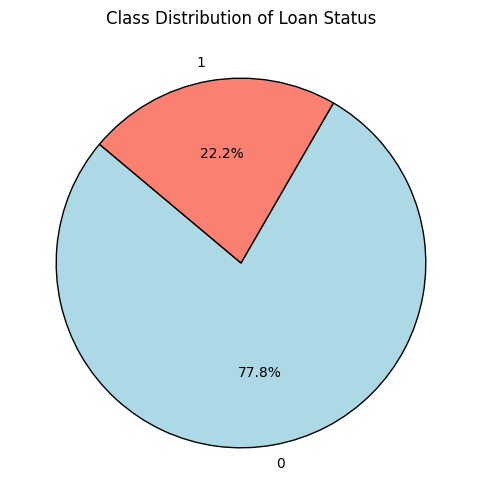

In [49]:
print(df["loan_status"].value_counts())  # Count occurrences of each class
print("\nClass Distribution (Percentage):")

# Plot Pie Chart
class_counts = df["loan_status"].value_counts(normalize=True)
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct="%1.1f%%", 
        colors=["lightblue", "salmon"], startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title("Class Distribution of Loan Status")
plt.show()

In [ ]:
# Define threshold
threshold = 3

# Function to count outliers using Z-score
def detect_outliers_zscore(df, threshold=3):
    outlier_counts = {}
    for col in df.select_dtypes(include=['number']).columns:
        z_scores = np.abs(stats.zscore(df[col]))  # Compute Z-scores
        outliers_count = (z_scores > threshold).sum()  # Count outliers
        outlier_counts[col] = outliers_count
    return outlier_counts

# Get outlier counts
outlier_counts_zscore = detect_outliers_zscore(df, threshold=3)

outlier_counts_df = pd.DataFrame(list(outlier_counts_zscore.items()), columns=["Feature", "Outliers"])
outlier_counts_df.set_index("Feature", inplace=True)

# Display the result in a neat table format
print("\n🔹 Outlier Counts (Using Z-score Method, Threshold = 3):")
print(tabulate(outlier_counts_df, headers='keys', tablefmt='pretty'))



🔹 Outlier Counts (Using Z-score Method, Threshold = 3):
+----------------------------+----------+
|          Feature           | Outliers |
+----------------------------+----------+
|         person_age         |   762    |
|       person_income        |   286    |
|       person_emp_exp       |   741    |
|         loan_amnt          |   448    |
|       loan_int_rate        |    84    |
|    loan_percent_income     |   431    |
| cb_person_cred_hist_length |   355    |
|        credit_score        |   236    |
|        loan_status         |    0     |
+----------------------------+----------+


## Data Preprocessing
We Handle missing values, encode categorical features and standardize numeric features.

Operations performed:
- Drop Missing Values: Doesn't have effect in this case
- Encode Categorical features into numeric
- select features and target into the variables X and y
- Normalize the Dataset

In [29]:
# Handle missing values (impute or drop)
df.dropna(inplace=True)

# Encode categorical features
label_encoders = {}
categorical_cols = ["person_gender", "person_education", "person_home_ownership", "loan_intent", "previous_loan_defaults_on_file"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Select features and target
X = df.drop(columns=["loan_status"])
y = df["loan_status"]

# Normalize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)


## Train-Test Split

We split the data into **80% training** and **20% test** sets using 'train_test_split'.

In [15]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression Model
We fit a logistic regression model using 'sklearn' and evaluate test set accuracy.

In [16]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.4f}")

Logistic Regression Accuracy: 0.8901


## Neural Network Implementation
We implement a single-layer neural network with:
- **Sigmoid activation**
- Random weight initialization
- **Forward propagation**
- **Backward propagation**
- Binary cross-entropy loss
- Gradient descent updates

## Neural Network Implementation

We implement a single-layer neural network with:

#### 1. Sigmoid Activation: The sigmoid function squashes the output between 0 and 1, ideal for binary classification.
- Formula: 
  $\sigma(z) = \frac{1}{1 + e^{-z}}$

---

#### 2. Random Weight Initialization
Weights are initialized randomly to break symmetry and allow learning of distinct features.

---

#### 3. Forward Propagation
Compute the predicted output $ \hat{y} $ from input features $ x $, weights $ w $, and bias $ b $.
- Formula: 
  $z = w \cdot x + b$

  $\hat{y} = \sigma(z)$

---

#### 4. Binary Cross-Entropy Loss
Measures the difference between the predicted output \( \hat{y} \) and the actual label \( y \).
- Formula: 
  
  $\text{Loss}(y, \hat{y}) = - \left[ y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right]$
  

---

#### 5. Backward Propagation
Compute gradients of the loss with respect to weights and bias.
- Gradient for weight: $\frac{\partial \text{Loss}}{\partial w} = (\hat{y} - y) \cdot \sigma'(z) \cdot x$

- Gradient for bias: $\frac{\partial \text{Loss}}{\partial b} = (\hat{y} - y) \cdot \sigma'(z)$
  
  where $ \sigma'(z) = \hat{y}(1 - \hat{y}) $ is the derivative of the `Sigmoid Function`.

---

#### 6. Gradient Descent Updates
Update weights and bias using gradients.
- Weight update: $w = w - \eta \frac{\partial \text{Loss}}{\partial w}$
  
- Bias update: $b = b - \eta \frac{\partial \text{Loss}}{\partial b}$
  
  where $ \eta $ is the learning rate.

---


### Neural Network Code

In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, learning_rate=0.01, epochs=1000):
        # Initialization of NN
        self.input_size = input_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.random.randn(input_size, 1) * 0.01    # Generate random weights
        self.bias = np.zeros((1,))

    def sigmoid(self, z):
        # Sigmoid Activation Function
        return 1/(1 + np.exp(-z))
    
    def sigmoid_derivative(self, z):
        # Derivative of Sigmoid Activation Function
        return self.sigmoid(z) * (1 - self.sigmoid(z))
    
    def forward(self, X):
        #Forward Propagation to compute Predictions
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)

    def backward(self, X, y, y_pred):
        # Backpropagation to compute gradients
        n = X.shape[0]      # Size of the training data
        dz = y_pred - y.values.reshape(-1,1)    # Gradient for loss
        dw = np.dot(X.T, dz) / n                # Gradient for weight
        db = np.sum(dz) / n                     # Gradient for bias
        return dw, db
    
    def train(self, X, y):
        # Train the neural network using gradient descent
        for epoch in range(self.epochs):
            # Compute prediction from forward propagation
            y_pred = self.forward(X)

            # Get gradients from backpropagation
            dw, db = self.backward(X, y, y_pred)

            # Update weights and bias using gradients
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Print loss every 100 epochs
            # Loss calculated by Binary Cross 
            if epoch % 100 == 0:
                loss = -np.mean(y.values.reshape(-1, 1) * np.log(y_pred + 1e-8) + (1 - y.values.reshape(-1, 1)) * np.log(1 - y_pred + 1e-8))
                print(f"Epoch: {epoch}, Loss: {loss:.4f}")
    
    def predict(self, X):
        # Predict using trained weights
        return (self.forward(X) >= 0.5).astype(int) 


## Training Neural Network for Different Epochs
We train the neural network with increasing epochs:
- 1,000
- 5,000
- 10,000
- 15,000

### Training the model With 1000 epochs:

In [46]:
nn = NeuralNetwork(input_size=X_train.shape[1], learning_rate=0.01, epochs=1000)
nn.train(X_train, y_train)

Epoch: 0, Loss: 0.6953
Epoch: 100, Loss: 0.5547
Epoch: 200, Loss: 0.4763
Epoch: 300, Loss: 0.4277
Epoch: 400, Loss: 0.3948
Epoch: 500, Loss: 0.3711
Epoch: 600, Loss: 0.3533
Epoch: 700, Loss: 0.3394
Epoch: 800, Loss: 0.3283
Epoch: 900, Loss: 0.3191


In [47]:
y_pred_nn = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, y_pred_nn)
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")

Neural Network Accuracy: 0.8843


### Training the model With 5,000 epochs:

In [48]:
nn = NeuralNetwork(input_size=X_train.shape[1], learning_rate=0.01, epochs=5000)
nn.train(X_train, y_train)

Epoch: 0, Loss: 0.6982
Epoch: 100, Loss: 0.5563
Epoch: 200, Loss: 0.4773
Epoch: 300, Loss: 0.4283
Epoch: 400, Loss: 0.3953
Epoch: 500, Loss: 0.3715
Epoch: 600, Loss: 0.3536
Epoch: 700, Loss: 0.3396
Epoch: 800, Loss: 0.3285
Epoch: 900, Loss: 0.3193
Epoch: 1000, Loss: 0.3117
Epoch: 1100, Loss: 0.3052
Epoch: 1200, Loss: 0.2996
Epoch: 1300, Loss: 0.2948
Epoch: 1400, Loss: 0.2906
Epoch: 1500, Loss: 0.2869
Epoch: 1600, Loss: 0.2836
Epoch: 1700, Loss: 0.2807
Epoch: 1800, Loss: 0.2780
Epoch: 1900, Loss: 0.2757
Epoch: 2000, Loss: 0.2735
Epoch: 2100, Loss: 0.2715
Epoch: 2200, Loss: 0.2697
Epoch: 2300, Loss: 0.2680
Epoch: 2400, Loss: 0.2665
Epoch: 2500, Loss: 0.2650
Epoch: 2600, Loss: 0.2637
Epoch: 2700, Loss: 0.2625
Epoch: 2800, Loss: 0.2613
Epoch: 2900, Loss: 0.2603
Epoch: 3000, Loss: 0.2592
Epoch: 3100, Loss: 0.2583
Epoch: 3200, Loss: 0.2574
Epoch: 3300, Loss: 0.2566
Epoch: 3400, Loss: 0.2558
Epoch: 3500, Loss: 0.2551
Epoch: 3600, Loss: 0.2543
Epoch: 3700, Loss: 0.2537
Epoch: 3800, Loss: 0.253

In [49]:
y_pred_nn = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, y_pred_nn)
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")

Neural Network Accuracy: 0.8881


### Training the model With 10,000 epochs

In [55]:
nn = NeuralNetwork(input_size=X_train.shape[1], learning_rate=0.01, epochs=10000)
nn.train(X_train, y_train)

Epoch: 0, Loss: 0.6937
Epoch: 100, Loss: 0.5540
Epoch: 200, Loss: 0.4760
Epoch: 300, Loss: 0.4275
Epoch: 400, Loss: 0.3947
Epoch: 500, Loss: 0.3710
Epoch: 600, Loss: 0.3532
Epoch: 700, Loss: 0.3393
Epoch: 800, Loss: 0.3282
Epoch: 900, Loss: 0.3191
Epoch: 1000, Loss: 0.3114
Epoch: 1100, Loss: 0.3050
Epoch: 1200, Loss: 0.2995
Epoch: 1300, Loss: 0.2947
Epoch: 1400, Loss: 0.2905
Epoch: 1500, Loss: 0.2868
Epoch: 1600, Loss: 0.2835
Epoch: 1700, Loss: 0.2806
Epoch: 1800, Loss: 0.2779
Epoch: 1900, Loss: 0.2755
Epoch: 2000, Loss: 0.2734
Epoch: 2100, Loss: 0.2714
Epoch: 2200, Loss: 0.2696
Epoch: 2300, Loss: 0.2679
Epoch: 2400, Loss: 0.2664
Epoch: 2500, Loss: 0.2649
Epoch: 2600, Loss: 0.2636
Epoch: 2700, Loss: 0.2624
Epoch: 2800, Loss: 0.2613
Epoch: 2900, Loss: 0.2602
Epoch: 3000, Loss: 0.2592
Epoch: 3100, Loss: 0.2582
Epoch: 3200, Loss: 0.2574
Epoch: 3300, Loss: 0.2565
Epoch: 3400, Loss: 0.2557
Epoch: 3500, Loss: 0.2550
Epoch: 3600, Loss: 0.2543
Epoch: 3700, Loss: 0.2536
Epoch: 3800, Loss: 0.253

In [56]:
y_pred_nn = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, y_pred_nn)
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")

Neural Network Accuracy: 0.8893


### Training the model with 15,000 epochs

In [57]:
nn = NeuralNetwork(input_size=X_train.shape[1], learning_rate=0.01, epochs=15000)
nn.train(X_train, y_train)

Epoch: 0, Loss: 0.6955
Epoch: 100, Loss: 0.5544
Epoch: 200, Loss: 0.4759
Epoch: 300, Loss: 0.4273
Epoch: 400, Loss: 0.3944
Epoch: 500, Loss: 0.3708
Epoch: 600, Loss: 0.3530
Epoch: 700, Loss: 0.3391
Epoch: 800, Loss: 0.3280
Epoch: 900, Loss: 0.3189
Epoch: 1000, Loss: 0.3113
Epoch: 1100, Loss: 0.3049
Epoch: 1200, Loss: 0.2994
Epoch: 1300, Loss: 0.2946
Epoch: 1400, Loss: 0.2904
Epoch: 1500, Loss: 0.2867
Epoch: 1600, Loss: 0.2834
Epoch: 1700, Loss: 0.2805
Epoch: 1800, Loss: 0.2779
Epoch: 1900, Loss: 0.2755
Epoch: 2000, Loss: 0.2733
Epoch: 2100, Loss: 0.2713
Epoch: 2200, Loss: 0.2695
Epoch: 2300, Loss: 0.2679
Epoch: 2400, Loss: 0.2663
Epoch: 2500, Loss: 0.2649
Epoch: 2600, Loss: 0.2636
Epoch: 2700, Loss: 0.2624
Epoch: 2800, Loss: 0.2612
Epoch: 2900, Loss: 0.2602
Epoch: 3000, Loss: 0.2592
Epoch: 3100, Loss: 0.2582
Epoch: 3200, Loss: 0.2573
Epoch: 3300, Loss: 0.2565
Epoch: 3400, Loss: 0.2557
Epoch: 3500, Loss: 0.2550
Epoch: 3600, Loss: 0.2543
Epoch: 3700, Loss: 0.2536
Epoch: 3800, Loss: 0.253

In [58]:
y_pred_nn = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, y_pred_nn)
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")

Neural Network Accuracy: 0.8892


This shows how longer training improves convergence and stabilizes accuracy. Although, The Accuracy remains very similar with both 10,000 (0.8893) and 15,000 (0.8892) epochs

## Model Comparison
| Model                | Accuracy |
|---------------------|---------:|
| Logistic Regression |   0.8901 |
| Neural Network      |   ~0.889 |

## What Does "Self-Learning" Mean?
When we say the model is "self-learning," we mean that it improves its own decision-making by learning from examples, without us having to program specific rules.

Imagine teaching someone to sort emails into "Spam" or "Not Spam." At first, they might guess randomly. But each time, you show them the correct answer. Over time, they notice patterns and adjust how they decide, without you giving them step-by-step instructions.

Our neural network works the same way. It looks at many examples where the correct answer is known. After each prediction, it compares what it guessed to the right answer. Then, it adjusts its internal settings to reduce its mistake. This adjustment process is called backpropagation — a way for the model to figure out exactly how to tweak itself to improve.

The more examples it sees, the better it gets at making accurate predictions, all by learning from feedback. That’s what makes it “self-learning” — it teaches itself from experience, without us writing out the rules.

# Part 2: Transformer Encoder from Scratch

## Overview of Model Components
We implement:
1. Token Embedding
2. Positional Encoding
3. Multi-Head Attention
4. Feedforward Network
5. Layer Normalization & Residuals

**Token Embedding:** Converts input tokens (integers) into vector representations.

**Positional Encoding:** Adds positional information to token embeddings to capture sequence order.

**Multi-Head Attention:** Allows the model to focus on different parts of the sequence simultaneously using multiple attention heads.

**Feedforward Network:** Applies a two-layer feedforward neural network with activation in between.

**Layer Normalization & Residual Connection:** Stabilizes training and prevents vanishing gradients.

**Encoder:** We stack these components to form the Transformer Encoder architecture.


## Implementation of Transformer Components
Below, we implement each component of the Transformer Encoder architecture.

In [3]:
import torch
import torch.nn as nn
import math

# Token Embedding Class
class TokenEmbedding(nn.Module):
    def __init__(self, vocab_size, embed_size):
        super(TokenEmbedding, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
    
    def forward(self, x):
        return self.embedding(x)

# Positional Encoding Class
class PositionalEncoding(nn.Module):
    def __init__(self, embed_size, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.embed_size = embed_size
        
        # Create the positional encoding matrix
        pe = torch.zeros(max_len, embed_size)
        position = torch.arange(0, max_len).unsqueeze(1).float()
        div_term = torch.exp(torch.arange(0, embed_size, 2).float() * -(math.log(10000.0) / embed_size))
        
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        
        self.register_buffer('pe', pe)

    def forward(self, x):
        return x + self.pe[:, :x.size(1)]


## Attention Mechanism Implementation
We now implement the attention components: Scaled Dot-Product Attention and Multi-Head Attention.

In [4]:
class ScaledDotProductAttention(nn.Module):
    def __init__(self):
        super(ScaledDotProductAttention, self).__init__()

    def forward(self, query, key, value, mask=None):
        d_k = query.size(-1)
        scores = torch.matmul(query, key.transpose(-2, -1)) / math.sqrt(d_k)
        
        if mask is not None:
            scores = scores.masked_fill(mask == 0, -1e9)
        
        attention = torch.softmax(scores, dim=-1)
        output = torch.matmul(attention, value)
        return output, attention


In [5]:
class MultiHeadAttention(nn.Module):
    def __init__(self, embed_size, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.embed_size = embed_size
        self.head_dim = embed_size // num_heads
        
        assert self.head_dim * num_heads == embed_size, "Embedding size should be divisible by the number of heads"
        
        self.query_linear = nn.Linear(embed_size, embed_size)
        self.key_linear = nn.Linear(embed_size, embed_size)
        self.value_linear = nn.Linear(embed_size, embed_size)
        
        self.attention = ScaledDotProductAttention()
        self.fc_out = nn.Linear(embed_size, embed_size)
    
    def forward(self, query, key, value, mask=None):
        N = query.size(0)
        
        query = self.query_linear(query)
        key = self.key_linear(key)
        value = self.value_linear(value)
        
        # Split the embedding into self.num_heads different heads
        query = query.view(N, -1, self.num_heads, self.head_dim).transpose(1, 2)
        key = key.view(N, -1, self.num_heads, self.head_dim).transpose(1, 2)
        value = value.view(N, -1, self.num_heads, self.head_dim).transpose(1, 2)
        
        out, attention = self.attention(query, key, value, mask)
        
        out = out.transpose(1, 2).contiguous().view(N, -1, self.num_heads * self.head_dim)
        out = self.fc_out(out)
        return out, attention


## Feedforward Network & Encoder Layer
Next, we implement the feedforward network, followed by the encoder layer which combines multi-head attention, feedforward network, residual connections, and normalization.

In [6]:
class FeedForward(nn.Module):
    def __init__(self, embed_size, hidden_size):
        super(FeedForward, self).__init__()
        self.fc1 = nn.Linear(embed_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, embed_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


In [7]:
class EncoderLayer(nn.Module):
    def __init__(self, embed_size, num_heads, hidden_size, dropout=0.1):
        super(EncoderLayer, self).__init__()
        self.attention = MultiHeadAttention(embed_size, num_heads)
        self.feedforward = FeedForward(embed_size, hidden_size)
        self.layer_norm1 = nn.LayerNorm(embed_size)
        self.layer_norm2 = nn.LayerNorm(embed_size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, mask=None):
        attention_output, _ = self.attention(x, x, x, mask)
        x = self.layer_norm1(x + self.dropout(attention_output))
        feedforward_output = self.feedforward(x)
        x = self.layer_norm2(x + self.dropout(feedforward_output))
        return x


## Transformer Encoder Assembly
We stack multiple encoder layers to build the full Transformer Encoder model.

In [18]:
class TransformerEncoder(nn.Module):
    def __init__(self, vocab_size, embed_size, num_heads, num_layers, hidden_size, max_len=5000, dropout=0.1):
        super(TransformerEncoder, self).__init__()
        self.token_embedding = TokenEmbedding(vocab_size, embed_size)
        self.positional_encoding = PositionalEncoding(embed_size, max_len)
        self.layers = nn.ModuleList([EncoderLayer(embed_size, num_heads, hidden_size, dropout) for _ in range(num_layers)])
        self.fc_out = nn.Linear(embed_size, vocab_size)  # Final output layer to predict vocab size

    def forward(self, x, mask=None):
        x = self.token_embedding(x)
        x = self.positional_encoding(x)
        
        for layer in self.layers:
            x = layer(x, mask)
            
        x = self.fc_out(x)  # Apply the final output layer
        return x

## Initializing the Transformer Encoder

We now initialize the Transformer Encoder model with the following hyperparameters:

- **vocab_size = 10:** Since our sequences consist of integers from 1 to 9, the vocabulary size is 10.
- **embed_size = 64:** The size of the embedding vectors for each token.
- **num_heads = 8:** Number of attention heads in multi-head attention.
- **num_layers = 2:** Number of stacked encoder layers.
- **hidden_size = 128:** Size of the hidden layer in the feedforward network.

These hyperparameters are chosen to balance model complexity and computational efficiency for the sequence reversal task.

In [19]:
# Initialize model
vocab_size = 10 
embed_size = 64
num_heads = 8
num_layers = 2
hidden_size = 128
model = TransformerEncoder(vocab_size, embed_size, num_heads, num_layers, hidden_size)

## Generating Synthetic Data
We create a function that will generate 1,000 random sequences of integers (1-9) of length 5, and use their reversed sequences as targets.

In [9]:
def generate_data(num_samples=1000, seq_length=5):
    inputs = []
    outputs = []
    for _ in range(num_samples):
        seq = torch.randint(1, 10, (seq_length,))
        inputs.append(seq)
        outputs.append(seq.flip(0))  # Reversing the sequence
    return torch.stack(inputs), torch.stack(outputs)

## Training the Transformer Encoder
We generate the dataset of random integer sequences (using our function defined above) and train the Transformer Encoder to reverse them. The model is trained using CrossEntropy loss and the Adam optimizer.

In [13]:
def train(model, inputs, targets, epochs=100, batch_size=32, lr=0.001):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    
    for epoch in range(epochs):
        model.train()
        for i in range(0, len(inputs), batch_size):
            input_batch = inputs[i:i+batch_size]
            target_batch = targets[i:i+batch_size]
            
            optimizer.zero_grad()
            output = model(input_batch)
            
            loss = criterion(output.view(-1, 10), target_batch.view(-1))
            loss.backward()
            optimizer.step()
        
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")

In [16]:
inputs, outputs = generate_data(num_samples=1000, seq_length=5)
inputs


tensor([[7, 4, 6, 8, 7],
        [6, 9, 9, 2, 1],
        [5, 3, 5, 4, 4],
        ...,
        [5, 5, 9, 4, 7],
        [6, 6, 2, 1, 8],
        [5, 4, 1, 9, 3]])

In [17]:
outputs

tensor([[7, 8, 6, 4, 7],
        [1, 2, 9, 9, 6],
        [4, 4, 5, 3, 5],
        ...,
        [7, 4, 9, 5, 5],
        [8, 1, 2, 6, 6],
        [3, 9, 1, 4, 5]])

In [20]:
train(model, inputs, outputs, epochs=100, batch_size=32, lr=0.001)


Epoch 1, Loss: 1.7836958169937134
Epoch 2, Loss: 1.3876034021377563
Epoch 3, Loss: 0.9225500226020813
Epoch 4, Loss: 0.662615180015564
Epoch 5, Loss: 0.3214099705219269
Epoch 6, Loss: 0.025905873626470566
Epoch 7, Loss: 0.008710681460797787
Epoch 8, Loss: 0.006626248359680176
Epoch 9, Loss: 0.005400773137807846
Epoch 10, Loss: 0.004067479632794857
Epoch 11, Loss: 0.018597546964883804
Epoch 12, Loss: 0.0044843899086117744
Epoch 13, Loss: 0.0030564439948648214
Epoch 14, Loss: 0.002779437694698572
Epoch 15, Loss: 0.0030849731992930174
Epoch 16, Loss: 0.0033361681271344423
Epoch 17, Loss: 0.00217841612175107
Epoch 18, Loss: 0.0015230335993692279
Epoch 19, Loss: 0.00136117625515908
Epoch 20, Loss: 0.0012402556603774428
Epoch 21, Loss: 0.0011951285414397717
Epoch 22, Loss: 0.0011263389606028795
Epoch 23, Loss: 0.0011338412296026945
Epoch 24, Loss: 0.0014043409610167146
Epoch 25, Loss: 0.0008249337552115321
Epoch 26, Loss: 0.0009470786899328232
Epoch 27, Loss: 0.000726224621757865
Epoch 28, L

## Model Evaluation
We evaluate the model on a sample input to check if it correctly reverses the sequence.

In [24]:
def generate_output(model, input_seq, max_len=5):
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradient computation for inference
        input_seq = input_seq.unsqueeze(0)  # Add batch dimension (1, seq_len)
        
        # Pass through the model
        output = model(input_seq)
        
        # Get the predicted sequence
        _, predicted_indices = output.max(dim=-1)  # Choose the index with the highest probability
        
        # Extract the predicted sequence from the output
        predicted_seq = predicted_indices.squeeze(0)  # Remove the batch dimension
        
        return predicted_seq

# Test the function
input_seq = torch.tensor([3, 5, 2, 4, 1])
predicted_seq = generate_output(model, input_seq)
print("Input sequence:", input_seq)
print("Predicted output:", predicted_seq)


Input sequence: tensor([3, 5, 2, 4, 1])
Predicted output: tensor([1, 4, 2, 5, 3])


## Model Architecture
```plaintext
                    +---------------------+
                    |      Input Data     |
                    |  (Batch, Seq_Length)|
                    +---------------------+
                             |
                             v
                    +--------------------------------------+
                    |  Token Embedding Layer               |
                    |     (Batch, Seq_Length, Embed_Size)  |
                    +--------------------------------------+
                             |
                             v
                    +--------------------------------------+
                    | Positional Encoding                  |
                    |     (Batch, Seq_Length, Embed_Size)  |
                    +--------------------------------------+
                             |
                             v
                +--------------------------------------------+
                | Encoder Layer (Multi-Head Attention + FFN) |
                | (Batch, Seq_Length, Embed_Size)            |
                +--------------------------------------------+
                             |
                             v
                +--------------------------------------------+
                | Encoder Layer (Multi-Head Attention + FFN) |
                | (Batch, Seq_Length, Embed_Size)            |
                +--------------------------------------------+
                             |
                             v
                       . . . 
                +--------------------------------------------+
                | Encoder Layer (Multi-Head Attention + FFN) |
                | (Batch, Seq_Length, Embed_Size)            |
                +--------------------------------------------+
                             |
                             v
                    +---------------------------------+
                    | Output (Sequence)               |
                    | (Batch, Seq_Length, Embed_Size) |
                    +---------------------------------+


### Explanation of Each Component:

#### **Input Data:**
The input consists of sequences of tokens, represented as a tensor of shape `(Batch, Seq_Length)`, where:
- **Batch** is the number of sequences processed in parallel (batch size).
- **Seq_Length** is the length of each input sequence.

#### **Token Embedding Layer:**
The token embedding layer converts the token IDs into dense vectors (embeddings) of a fixed size.
- **Output dimension:** `(Batch, Seq_Length, Embed_Size)`.
- **Embed_Size** is the dimension of the token embedding space (e.g., 256, 512).

#### **Positional Encoding:**
The positional encoding adds position-dependent information to the token embeddings.
- It is added element-wise to the embeddings, resulting in an output of the same shape as the input embeddings.
- **Output dimension:** `(Batch, Seq_Length, Embed_Size)`.

#### **Encoder Layer:**
Each encoder layer consists of:
1. **Multi-Head Attention:** Applies scaled dot-product attention and splits the embedding into multiple attention heads.
2. **FeedForward Network (FFN):** Applies a two-layer feedforward neural network with ReLU activation in between.
3. **Layer Normalization:** Applied after both the attention and FFN to stabilize the training.
4. **Residual Connections:** Added to the outputs from the attention and FFN layers.

- **Output dimension (after each encoder layer):** `(Batch, Seq_Length, Embed_Size)`.
- The number of encoder layers can vary, but in your case, it is specified by the `num_layers` parameter. Each layer produces an output tensor of the same shape as its input.

#### **Final Output:**
The final output of the transformer encoder is a tensor of shape `(Batch, Seq_Length, Embed_Size)`.
- For sequence-to-sequence tasks, this would be used to generate the final sequence. If you're using this for other tasks, the output can be further processed or passed to a decoder or classifier.

### Important Considerations:
- **Embedding Dimension (Embed_Size):** This is a hyperparameter that determines the size of the vectors for each token. Typically, it's set to values like 128, 256, or 512.
- **Sequence Length (Seq_Length):** This is the length of the input sequence (e.g., 5 tokens in your case).
- **Batch Size (Batch):** The number of sequences processed in one pass (e.g., 32 sequences).

### Full Architecture Summary:
- **Input:** `(Batch, Seq_Length)` → **Token Embedding** → **Positional Encoding** → **Encoder Layers (Repeat N times)** → **Final Output:** `(Batch, Seq_Length, Embed_Size)`

#### Inside Encoder Layers:
1. **Multi-Head Attention:** `(Batch, Seq_Length, Embed_Size)` → `(Batch, Seq_Length, Embed_Size)`
2. **FeedForward Network:** `(Batch, Seq_Length, Embed_Size)` → `(Batch, Seq_Length, Embed_Size)`

**Final Output:** `(Batch, Seq_Length, Embed_Size)` → Further processing if needed (e.g., classification, decoding).


## Evaluation Results & Commentary

### Model Evaluation Results:

- **Training Loss:**
  - The model’s loss decreased significantly over the training epochs.
  - For example:
    - Epoch 1 Loss: ~1.78
    - By Epoch 5: Loss dropped to ~0.32
    - After ~10 epochs, loss stabilized at a very low value (~0.004 or lower).
    - By epoch 90 onwards, the loss further reduced to extremely low values (~0.00009), indicating that the model successfully learned the sequence reversal task.
    - No unusual spikes or instability were observed — the loss consistently decreased and remained stable.

- **Prediction Test:**
  - When tested on an example input sequence `[3, 5, 2, 4, 1]`, the model correctly predicted the reversed sequence `[1, 4, 2, 5, 3]`.

---

### Conclusion:

We validated that the Transformer Encoder model learned the task successfully in three simple ways:

1. **Training Loss Behavior:**
   - The training loss steadily decreased and reached near-zero values.
   - This shows the model minimized errors and learned the sequence pattern well.

2. **Correct Output on Test Input:**
   - The model accurately reversed a new sequence that wasn’t explicitly seen during training.
   - This confirms the model generalized and didn't just memorize.

3. **Stable Training:**
   - No sudden spikes or instability in the loss.
   - Indicates smooth optimization and appropriate model settings.

Since this was a simple, structured task, these checks were enough to confirm the model performed well without overfitting or errors.